In [9]:
import os
import glob
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import shapely
import numpy as np
import math

# generate shapefile

In [10]:
widths_files = glob.glob(r'D:\Research\sidewalk_wheelchair\DC_DOMs_measuremens2\*.csv')
len(widths_files)

157367

In [11]:
def get_line(series):
    p = Point(series['col'], series['row'])
    p1 = Point(series['end_x'], series['end_y'])
    line = LineString([p1, p])
    return line

In [4]:
saved_path = r'D:\Research\sidewalk_wheelchair\DC_DOMs_width_shapes'
for idx, f in enumerate(widths_files):
    df = pd.read_csv(f)
    lines = df.apply(get_line, axis=1)
    gdf = gpd.GeoDataFrame(df, geometry=lines)
    basename = os.path.basename(f).replace(".csv", ".shp")
    new_name = os.path.join(saved_path, basename)
    gdf.to_file(new_name)

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


ValueError: Must pass array with one dimension only.

In [5]:
widths_file = r'D:\Research\sidewalk_wheelchair\widths_all4_not_touched.txt'

In [6]:
df_width = pd.read_csv(widths_file)

In [7]:
geo = df.apply(get_line, axis=1)

In [8]:
gdf_width2 = gpd.GeoDataFrame(df, geometry=geo)
gdf_width2.plot()

ValueError: Must pass array with one dimension only.

,panoId,contour_num,center_x,center_y,length,col,row,end_x,end_y,cover_ratio,is_touched,geometry
0,zzyR1A1-hodvLv7uH3-Rug,0,399314.252,137315.644,0.70,399314.252,137315.294,399314.252,137315.994,0.944,0,"LINESTRING (399314.252 137315.294, 399314.252 ..."
1,zzyR1A1-hodvLv7uH3-Rug,0,399314.752,137315.619,0.75,399314.752,137315.244,399314.752,137315.994,0.871,0,"LINESTRING (399314.752 137315.244, 399314.752 ..."
2,zzyR1A1-hodvLv7uH3-Rug,0,399316.752,137316.394,1.10,399316.752,137315.844,399316.752,137316.944,0.971,0,"LINESTRING (399316.752 137315.844, 399316.752 ..."
3,zzyR1A1-hodvLv7uH3-Rug,0,399317.252,137316.319,0.95,399317.252,137315.844,399317.252,137316.794,0.947,0,"LINESTRING (399317.252 137315.844, 399317.252 ..."
4,zzyR1A1-hodvLv7uH3-Rug,2,399306.302,137316.969,0.85,399306.302,137316.544,399306.302,137317.394,0.862,0,"LINESTRING (399306.302 137316.544, 399306.302 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,RyURfV8-j3aXhParlpCcrg,3,399297.163,137314.709,2.85,399297.163,137313.284,399297.163,137316.134,0.990,0,"LINESTRING (399297.163 137313.284, 399297.163 ..."
96,RyURfV8-j3aXhParlpCcrg,3,399298.163,137314.709,2.85,399298.163,137313.284,399298.163,137316.134,0.985,0,"LINESTRING (399298.163 137313.284, 399298.163 ..."
97,RyURfV8-j3aXhParlpCcrg,3,399298.663,137314.609,2.75,399298.663,137313.234,399298.663,137315.984,0.984,0,"LINESTRING (399298.663 137313.234, 399298.663 ..."
98,RyURfV8-j3aXhParlpCcrg,3,399299.163,137314.484,3.00,399299.163,137312.984,399299.163,137315.984,0.960,0,"LINESTRING (399299.163 137312.984, 399299.163 ..."


In [60]:
geo = [LineString([Point(row['col'], row["row"]), Point(row['end_x'], row['end_y'])]) for idx, row in df_width.iloc[:].iterrows()]

In [61]:
list(geo[111110].coords)

[(401265.178, 132163.727), (401267.228, 132161.777)]

In [62]:
gdf_width = gpd.GeoDataFrame(df_width, geometry=geo)

In [63]:
gdf_width.to_file("D:\widths_4_attributes.shp")

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [3]:
files = glob.glob(r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\*.jpg')



In [5]:
for idx, j in enumerate(files[:]):
    new_name = j.replace(".jpg", '_5.jpg')
    
    os.rename(j, new_name)
    
    if idx % 1000 == 0:
        print(idx, j)


0 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\--0O-2sTlrlaK3fneW4cDg.jpg
1000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\-hJwcO_sGzHdwkvsiD64rw.jpg
2000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\-Umod-zP85u86IXGJC4LrA.jpg
3000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\0azBhjt0BMtq9atgkr2MyQ.jpg
4000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\0nUdVxnWiGq36DeToDe5iQ.jpg
5000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\1-r0f-O14KIBvQjFgBA5Jg.jpg
6000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\1Hm52w9GHh1qhHxxVPSNeQ.jpg
7000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_

63000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\gy7fuou2e6Ga0uyQjzU54g.jpg
64000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\h6Z4jqqvC4lLzE3MVDpxiQ.jpg
65000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\HeSWj4B8XpRX5oZwCDf4uA.jpg
66000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\HlEpbQNPxkTfFhMtOJL24A.jpg
67000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\hRPy1AUs5-IPN_zaUm5TGQ.jpg
68000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\hxUnrJ1RHcFfgISTFyolNQ.jpg
69000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\I6CorbWKBuNDqgCeQ9cdtQ.jpg
70000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_whe

126000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\TgT3osKZo59UST7n8SbRrQ.jpg
127000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\TMziT1wzB4Ax0uBfF_k-iA.jpg
128000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\tTBf73sSDt2TtSX8ZsuBsA.jpg
129000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\TZOM-60FV1UneLPkQX6X0A.jpg
130000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\U9l6ceCFKptoAM78-Eb3aQ.jpg
131000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\uG3Ee8iPvrovcAXUXif-Tw.jpg
132000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\UM3m_BEw9mriBSTTlyf4ow.jpg
133000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\side

In [8]:
zoom = 4
for z in range(5, zoom, -1):
    print(z)

5


In [41]:
import numpy as np
a = np.ones((100, 100))

In [56]:
a[1, 100:103].sum()

0.0

# move roadways to sidewalk line

In [ ]:
shp_file = r'D:\Research\sidewalk_wheelchair\widths_all4_not_touched3.shp'
road_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_Block6487.shp'

gdf_road = gpd.read_file(road_shp_file)


In [13]:
def degree_difference(angle1, angle2):
    diff = abs(angle1 - angle2) % 360
#    if diff > 180:
#        diff = 360 - diff
    return diff

def find_smallest_angle(angle, angle_list):
    diff = [degree_difference(angle, a) for a in angle_list]
    return np.argmin(diff)
    
find_smallest_angle(100, [0, 2801])

0

In [17]:
gdf = gpd.read_file(shp_file)


In [18]:
mean_angle

NameError: name 'mean_angle' is not defined

In [24]:
df['NEAR_ANGLE'].mean()

57.78956829128745

In [21]:
gdf_road

,OBJECTID,ROUTEID,FROMMEASUR,TOMEASURE,ROUTENAME,ROADTYPE,BLOCKKEY,TOTALTRAVE,TOTALPARKI,TOTALRAISE,...,RIGHTTUR_1,TOTALBIKEL,TOTALBIK_1,RPPDIRECTI,RPPSIDE,SLOWSTREET,SHAPELEN,SHAPE_1,FID_0,geometry
0,68801,14047972,530.475586,653.120911,INDEPENDENCE AVE SW,1,17645a0bbbce8d16873b6d4134041c21,6,2,0,...,0,0,0,None,None,None,0,None,0,"LINESTRING Z (398682.974 135526.034 0.000, 398..."
1,68802,13068362,0.000000,9.763900,OXON RUN PL SE,1,3ca7098f9b049317d7eae7479de149b5,2,0,0,...,0,0,0,None,None,None,0,None,1,"LINESTRING Z (404019.743 132283.534 0.000, 404..."
2,68803,13012092,2500.530518,2834.991699,B ST SE,1,ba09d4e62918d587c013bf70f5f4aca2,2,2,0,...,0,0,0,None,None,None,0,None,2,"LINESTRING Z (406678.883 135290.704 0.000, 406..."
3,68804,13059452,784.465881,982.860291,MARTIN LUTHER KING JR AVE SE,1,40894de5be69af4b9a3517bb2f29d637,4,0,0,...,0,0,0,None,None,None,0,None,3,"LINESTRING Z (400672.862 132772.834 0.000, 400..."
4,68805,12094482A,0.000000,78.573998,WRIGHT TER NE,1,509f3aef181ebe1834a002b25f561b12,2,2,0,...,0,0,0,None,None,None,0,None,4,"LINESTRING Z (403862.799 139511.733 0.000, 403..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13744,82547,14093362,180.891495,366.575409,WICK DR SW,1,afbb98ffd7f46aee54ee6a0d4dd0268a,2,0,0,...,0,0,0,None,None,None,0,None,13744,"LINESTRING Z (398989.152 132172.573 0.000, 398..."
13745,82548,13000302,1017.278870,1066.685303,3RD ST SE,1,393848a51372b0cb98765d29aaf82a4c,2,0,0,...,0,0,0,3,B,"Local street, no buses; should install contraf...",0,None,13745,"LINESTRING Z (399822.008 134757.538 0.000, 399..."
13746,82549,13004902,314.823486,391.195496,49TH ST SE,1,857a397acc0f659d3693b5b998a38b34,2,2,0,...,0,0,0,None,None,NEW Connect C up to Brooks,0,None,13746,"LINESTRING Z (405841.443 135461.374 0.000, 405..."
13747,82550,13048752,330.822113,415.402313,IRVING ST SE,1,10f976e835a275aaa157aa31a0fc3e09,2,2,0,...,0,0,0,None,None,None,0,None,13747,"LINESTRING Z (402412.333 131690.783 0.000, 402..."


In [30]:
def parallel_centerline(gdf, gdf_road, id_column):
    parallels_geo = []
    parallels_df = pd.DataFrame(columns={id_column: str, 'width': float, "side": str})
    for idx, row in gdf_road.iterrows():
        try:
            if idx % 250 == 0:
                print("Processing: ", idx)
            FID = row[id_column]
            df = gdf[gdf["NEAR_FID"] == FID]
            df = df[df["Shape_Leng"] >  0.5]
            df = df[df["NEAR_DIST"] >  2]

            df_road = gdf_road[gdf_road[id_column] == FID]
            linestring = df_road['geometry'].iloc[0]

            

            distance_list = []
            width_list = []
            angle_list = []
            df_list = []

            left_index = 1
            right_index = 1 - left_index


            start_point =(linestring.xy[0][0],  linestring.xy[1][1])
            end_point =  (linestring.xy[0][-1], linestring.xy[1][-1])

            # road_direction = math.atan((-start_point[1] + end_point[1]) / (-start_point[0] + end_point[0]))
            road_direction = math.atan2((-start_point[1] + end_point[1]) , (-start_point[0] + end_point[0]))

            road_direction = math.degrees(road_direction)  % 360
            # print("road_direction:", road_direction)
            # print("road_direction - 90 (left_angle):", (road_direction - 90) % 360)
            #print("-start_point[1] + end_point[1]: ", -start_point[1] + end_point[1])
            #print("-start_point[0] + end_point[0]:", -start_point[0] + end_point[0])

            direction = start_point[1] - end_point[1]

            mean_angle = df['NEAR_ANGLE'].mean()

            angle1 = df[df['NEAR_ANGLE'] > mean_angle]['NEAR_ANGLE'].median() % 360
            angle2 = df[df['NEAR_ANGLE'] < mean_angle]['NEAR_ANGLE'].median() % 360
            angle_list.append(angle1)
            angle_list.append(angle2)


            left_index = find_smallest_angle((road_direction - 90) % 360, angle_list)
            right_index = 1 - left_index

            # print("left_index, right_index:", left_index, right_index)
            # print("left_angle, right_angle:", angle_list[left_index], angle_list[right_index])

            df1 =  df[df['NEAR_ANGLE'] > mean_angle]
            df2 =  df[df['NEAR_ANGLE'] < mean_angle]
            df_list.append(df1)
            df_list.append(df2)

            dis1 = df1['NEAR_DIST'].mean()
            dis2 = df2['NEAR_DIST'].mean()
            distance_list.append(dis1)
            distance_list.append(dis2)


            width1 = df[df['NEAR_ANGLE'] > mean_angle]['Shape_Leng'].quantile(0.2)
            width2 = df[df['NEAR_ANGLE'] < mean_angle]['Shape_Leng'].quantile(0.2)
            width_list.append(width1)
            width_list.append(width2)


            # print("angle1, angle2: ", angle1, angle2)
            # print("dis1, dis2: ", dis1, dis2)
            # print("width1, width2: ", width1, width2)

            df_left = df_list[left_index]
            df_right = df_list[right_index]

            minimum_measurement_cnt = 5

            if len(df_left) > minimum_measurement_cnt:
                left_line = linestring.parallel_offset(distance=distance_list[left_index] , side="left", join_style=2)
                left_line2 = linestring.parallel_offset(distance=distance_list[left_index] + width_list[left_index], side="left", join_style=2)
                left_line_center = linestring.parallel_offset(distance=distance_list[left_index]  + width_list[left_index]/2, \
                                                              side="left", join_style=2)
                parallels_geo.append(left_line)
                parallels_geo.append(left_line2)
                parallels_geo.append(left_line_center)
                
                df_line = {id_column: FID, "width": f"{width_list[left_index]:.3f}", 'side':"left_near"}
                #  print(df_line)

                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[left_index]:.3f}", 'side':"left_far"}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[left_index]:.3f}", 'side':"left_center"}
                parallels_df = parallels_df.append(df_line, ignore_index=True)

            if len(df_right)  > minimum_measurement_cnt:
                right_line = linestring.parallel_offset(distance=distance_list[right_index] , side="right", join_style=2)             
                right_line2 = linestring.parallel_offset(distance=distance_list[right_index] + width_list[right_index], side="right", join_style=2)
                right_line_center = linestring.parallel_offset(distance=distance_list[right_index] + width_list[right_index]/2, \
                                                               side="right", join_style=2)

                
                
                parallels_geo.append(right_line)
                parallels_geo.append(right_line2)
                parallels_geo.append(right_line_center)
                
                df_line = {id_column: FID, "width": f"{width_list[right_index]:.3f}", 'side':"right_near"}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[right_index]:.3f}", 'side':"right_far"}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[right_index]:.3f}", 'side':"right_center"}
                parallels_df = parallels_df.append(df_line, ignore_index=True)


            is_draw = False

            if is_draw:
                df.plot(ax=ax)
                df_road.plot(ax=ax, color='black')
                figure, ax = plt.subplots(figsize=(15, 15))
                ax.plot(right_line.xy[0], right_line.xy[1])
                ax.plot(left_line.xy[0], left_line.xy[1])

                ax.plot(right_line2.xy[0], right_line2.xy[1])
                ax.plot(left_line2.xy[0], left_line2.xy[1])

                ax.scatter(linestring.xy[0][0], linestring.xy[1][0])
                # ax.scatter(linestring.xy[0][-1], linestring.xy[1][-1])

                #print("start_point:", start_point)
                #print("direction:", direction)

                plt.axis("scaled")
        except Exception as e:
            print("Error in idx:", idx, e)
            continue
    # print(parallels_df)
    parallel_gdf = gpd.GeoDataFrame(parallels_df, geometry=parallels_geo)
    parallel_gdf.to_file("parallels_centerline_20210606.shp")
    print("Done.")
    
parallel_centerline(gdf, gdf_road[:], id_column="FID_0")

Processing:  0
Processing:  250
Processing:  500
Processing:  750
Processing:  1000
Processing:  1250
Processing:  1500
Processing:  1750
Processing:  2000
Processing:  2250
Processing:  2500
Processing:  2750
Processing:  3000
Processing:  3250
Processing:  3500
Processing:  3750
Error in idx: 3854 
Processing:  4000
Processing:  4250
Processing:  4500
Processing:  4750
Processing:  5000
Processing:  5250
Processing:  5500
Processing:  5750
Processing:  6000
Processing:  6250
Processing:  6500
Processing:  6750
Processing:  7000
Processing:  7250
Processing:  7500
Processing:  7750
Processing:  8000
Processing:  8250
Processing:  8500
Processing:  8750
Processing:  9000
Processing:  9250
Processing:  9500
Processing:  9750
Processing:  10000
Processing:  10250
Processing:  10500
Processing:  10750
Processing:  11000
Processing:  11250
Processing:  11500
Processing:  11750
Processing:  12000
Processing:  12250
Processing:  12500
Processing:  12750
Processing:  13000
Processing:  13250


In [416]:
id_column = 'FID_0'
gdf_road[id_column] 

0            0
1            1
2            2
3            3
4            4
         ...  
13744    13744
13745    13745
13746    13746
13747    13747
13748    13748
Name: FID_0, Length: 13749, dtype: int64

angel1, angel2:  89.8258505256 -90.2974581408
dis1, dis2:  10.44788915317336 14.911290409333333
width1, width2:  3.800263113106 1.75


(398554.18512324226, 398689.2997033254, 135508.23644033747, 135545.5134076012)

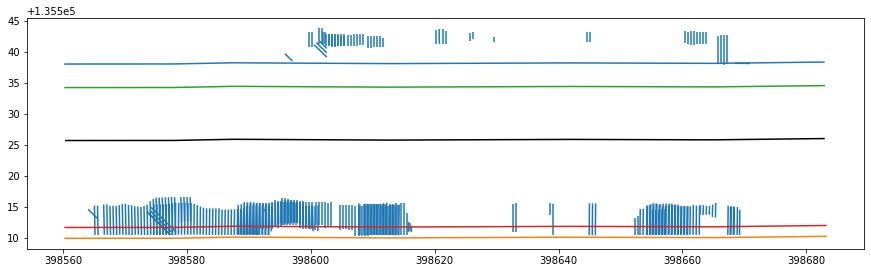

In [26]:
FID = 0


df = gdf[gdf["NEAR_FID"] == FID]
df = df[df["Shape_Leng"] >  0.5]

mean_angle = df['NEAR_ANGLE'].mean()

df_road = gdf_road[gdf_road["FID_0"] == FID]
linestring = df_road['geometry'].iloc[0]

figure, ax = plt.subplots(figsize=(15, 15))

df.plot(ax=ax)
df_road.plot(ax=ax, color='black')

dis1 = df[df['NEAR_ANGLE'] > mean_angle]['NEAR_DIST'].mean()
dis2 = df[df['NEAR_ANGLE'] < mean_angle]['NEAR_DIST'].mean()


angel1 = df[df['NEAR_ANGLE'] > mean_angle]['NEAR_ANGLE'].median()
angel2 = df[df['NEAR_ANGLE'] < mean_angle]['NEAR_ANGLE'].median()

width1 = df[df['NEAR_ANGLE'] > mean_angle]['Shape_Leng'].quantile(0.2)
width2 = df[df['NEAR_ANGLE'] < mean_angle]['Shape_Leng'].quantile(0.2)

print("angel1, angel2: ", angel1, angel2)
print("dis1, dis2: ", dis1, dis2)
print("width1, width2: ", width1, width2)

left_line = linestring.parallel_offset(distance=dis2 + width2/2, side="left", join_style=2)
right_line = linestring.parallel_offset(distance=dis1 + width1/2, side="right", join_style=2)

ax.plot(right_line.xy[0], right_line.xy[1])
ax.plot(left_line.xy[0], left_line.xy[1])


left_line = linestring.parallel_offset(distance=dis2 - width2/2, side="left", join_style=2)
right_line = linestring.parallel_offset(distance=dis1 - width1/2, side="right", join_style=2)

ax.plot(right_line.xy[0], right_line.xy[1])
ax.plot(left_line.xy[0], left_line.xy[1])


plt.axis("scaled")

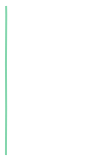

In [251]:
linestring

In [252]:

# plt.plot(left_line.xy[0], left_line.xy[1], ax=ax)
# plt.axis("scaled")
plt.show()

In [98]:
ax.plot(right_line.xy[0], right_line.xy[1])

AttributeError: 'list' object has no attribute 'plot'

In [411]:
gdf_road

,OBJECTID,ROUTEID,FROMMEASUR,TOMEASURE,ROUTENAME,ROADTYPE,BLOCKKEY,TOTALTRAVE,TOTALPARKI,TOTALRAISE,...,RIGHTTUR_1,TOTALBIKEL,TOTALBIK_1,RPPDIRECTI,RPPSIDE,SLOWSTREET,SHAPELEN,SHAPE_1,FID_0,geometry
0,68801,14047972,530.475586,653.120911,INDEPENDENCE AVE SW,1,17645a0bbbce8d16873b6d4134041c21,6,2,0,...,0,0,0,None,None,None,0,None,0,"LINESTRING Z (398682.974 135526.034 0.000, 398..."
1,68802,13068362,0.000000,9.763900,OXON RUN PL SE,1,3ca7098f9b049317d7eae7479de149b5,2,0,0,...,0,0,0,None,None,None,0,None,1,"LINESTRING Z (404019.743 132283.534 0.000, 404..."
2,68803,13012092,2500.530518,2834.991699,B ST SE,1,ba09d4e62918d587c013bf70f5f4aca2,2,2,0,...,0,0,0,None,None,None,0,None,2,"LINESTRING Z (406678.883 135290.704 0.000, 406..."
3,68804,13059452,784.465881,982.860291,MARTIN LUTHER KING JR AVE SE,1,40894de5be69af4b9a3517bb2f29d637,4,0,0,...,0,0,0,None,None,None,0,None,3,"LINESTRING Z (400672.862 132772.834 0.000, 400..."
4,68805,12094482A,0.000000,78.573998,WRIGHT TER NE,1,509f3aef181ebe1834a002b25f561b12,2,2,0,...,0,0,0,None,None,None,0,None,4,"LINESTRING Z (403862.799 139511.733 0.000, 403..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13744,82547,14093362,180.891495,366.575409,WICK DR SW,1,afbb98ffd7f46aee54ee6a0d4dd0268a,2,0,0,...,0,0,0,None,None,None,0,None,13744,"LINESTRING Z (398989.152 132172.573 0.000, 398..."
13745,82548,13000302,1017.278870,1066.685303,3RD ST SE,1,393848a51372b0cb98765d29aaf82a4c,2,0,0,...,0,0,0,3,B,"Local street, no buses; should install contraf...",0,None,13745,"LINESTRING Z (399822.008 134757.538 0.000, 399..."
13746,82549,13004902,314.823486,391.195496,49TH ST SE,1,857a397acc0f659d3693b5b998a38b34,2,2,0,...,0,0,0,None,None,NEW Connect C up to Brooks,0,None,13746,"LINESTRING Z (405841.443 135461.374 0.000, 405..."
13747,82550,13048752,330.822113,415.402313,IRVING ST SE,1,10f976e835a275aaa157aa31a0fc3e09,2,2,0,...,0,0,0,None,None,None,0,None,13747,"LINESTRING Z (402412.333 131690.783 0.000, 402..."


In [187]:
df['NEAR_DIST'].mean()

7.413687329507999

In [48]:
mean_angle = df['NEAR_ANGLE'].mean()
mean_angle

10.417865198694358

In [152]:
df

,col,row,end_x,end_y,Shape_Leng,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE,geometry
6043460,397645.135,137968.675,397637.985,137968.625,7.150175,600,8.581867,397645.234134,137977.256294,89.338130,"LINESTRING (397645.135 137968.675, 397637.985 ..."
6043461,397644.985,137969.175,397637.985,137969.125,7.000179,600,8.083633,397645.078379,137977.258093,89.338130,"LINESTRING (397644.985 137969.175, 397637.985 ..."
6043462,397644.835,137969.675,397637.935,137969.625,6.900181,600,7.585399,397644.922623,137977.259893,89.338130,"LINESTRING (397644.835 137969.675, 397637.935 ..."
6043463,397641.085,137973.175,397640.885,137973.175,0.200000,600,4.128951,397641.132696,137977.303675,89.338130,"LINESTRING (397641.085 137973.175, 397640.885 ..."
6043534,397645.405,137986.555,397641.405,137986.555,4.000000,600,9.253853,397641.298104,137977.301764,-90.661870,"LINESTRING (397645.405 137986.555, 397641.405 ..."
...,...,...,...,...,...,...,...,...,...,...,...
8643407,397615.792,137967.396,397615.792,137966.896,0.500000,600,9.994070,397615.748291,137977.389974,90.250584,"LINESTRING (397615.792 137967.396, 397615.792 ..."
8643408,397614.792,137967.396,397614.792,137967.196,0.200000,600,9.989697,397614.748310,137977.385601,90.250584,"LINESTRING (397614.792 137967.396, 397614.792 ..."
8643409,397580.660,137961.084,397581.160,137961.084,0.500000,600,16.151540,397580.588868,137977.235383,90.252334,"LINESTRING (397580.660 137961.084, 397581.160 ..."
10128984,397574.650,137981.194,397573.800,137981.244,0.851469,600,3.984733,397574.667549,137977.209305,-89.747666,"LINESTRING (397574.650 137981.194, 397573.800 ..."
